# Lab 3: Predicting a Categorical Target and Evaluating Performance - Titanic Dataset
**Author: David Rodriguez-Mayorquin**
**Date: March 19, 2025**

### Introduction
In this project, we use classification models to predict survival on the Titanic using various input features such as age, sex, passenger class, and fare. We will train multiple classification models, evaluate their performance using key metrics (accuracy, precision, recall, F1-score), and create visualizations to interpret the results. This exercise helps us understand how different machine learning models work and how to compare their strengths and weaknesses in real-world scenarios.

## Section 1. Import and Inspect the Data
### 2.1 Load the titanic dataset fdirectly from the seaborn library for consistency and simplicity.

In [29]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

## 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data
We begin by handling missing values in the dataset. Missing values in the `age` column are imputed using the median, and missing values in the `embark_town` column are filled with the mode.

### 2.2 Feature Engineering
We create a new feature called `family_size`, encode categorical variables such as `sex` and `embarked` into numeric values, and convert the binary `alone` column to numeric as well.


In [37]:
# 2.1 Handle Missing Values (avoiding chained assignment warning)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode().iloc[0])
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['sex'] = titanic['sex'].fillna('male')

# 2.2 Feature Engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

# Quick checks after preprocessing
print("Missing values remaining:")
print(titanic[['age', 'sex', 'embarked', 'embark_town']].isnull().sum())

print("\nSample of new features:")
print(titanic[['family_size', 'sex', 'embarked', 'alone']].head())


Missing values remaining:
age            0
sex            0
embarked       0
embark_town    0
dtype: int64

Sample of new features:
   family_size  sex  embarked  alone
0            2    0         2      0
1            2    0         2      0
2            1    0         2      1
3            2    0         2      0
4            1    0         2      1


## 3. Feature Selection and Justification

### 3.1 Choose Features and Target
In this section, we select 2 or more input fatures and the target. Since this is a classification problem, we can use both categorical and numerical features. We used `survived` as the target.
Three different input scenarios are considered to evaluate how different features affect model performance:

- **Case 1:** Input feature – `alone`
- **Case 2:** Input feature – `age`
- **Case 3:** Input features – `age` and `family_size`

The **target variable is `survived`**, which indicates whether the passenger survived (1) or not (0).

### 3.2 Define `X` (features) and `y` (target)
We assign the selected input features to `X` and the target variable to `y`. Only one case is active at a time using code comments.


In [46]:
# Case 1: alone only
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age and family_size
# X = titanic[['age', 'family_size']]
# y = titanic['survived']

# Show shape for confirmation
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (891, 1)
Target vector y shape: (891,)


2.1.2 Histogram - Age Distribution

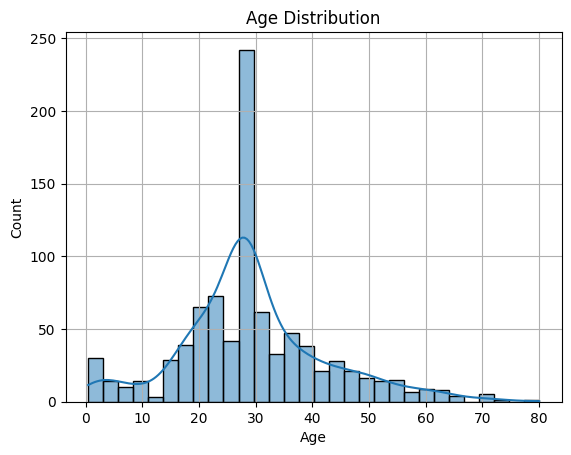

In [47]:
# Histogram of Age
# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(titanic['age'], kde=True)

# Add title and display
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


2.1.3 Count Plot – Class Distribution by Survival

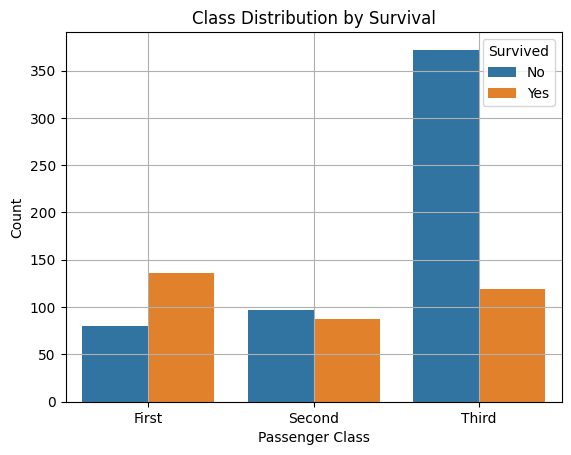

In [48]:
# Count Plot - Class Distribution by Survival
# Count plot: Passenger class with survival hue
sns.countplot(x='class', hue='survived', data=titanic)

# Add title and display
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


### Reflection 2.1
1. What patterns or anomalies do you notice? 
   - Age and fare do not have a clear linear relationship
   - There are missing age values
   - Some passengers paid very high fares and some fares are 0 (zero).
2. Do any features stand out as potential predictors? 
   - Gender, emales had a higher survival rate.
   - Pclass or Passenger class, Higher class passengers seems to survive more often.
   - Family Size, passengers traveling alone may have lower survival chances.
3. Are there any visible class imbalances? Yes:
   - Survival class are imbalanced, more people did not survive than survived
   - Pclass has more passenger in 3rd class compared to 1st and 2nd.

### Section 2.2 
Handle Missing Values and Clean Data

In [49]:
# Section 2.2: Handle Missing Values and Clean Data

# Fill missing values in 'age' with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing values in 'embark_town' with the most frequent value (mode)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# After handling missing values, recheck missing values
print("Missing values after cleaning:")
print(titanic.isnull().sum())


Missing values after cleaning:
survived         0
pclass           0
sex            891
age              0
sibsp            0
parch            0
fare             0
embarked       891
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
family_size      0
dtype: int64


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_5581/1095074508.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_5581/1095074508.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### Section 2.3 
Feature Engineering

In [50]:
# Section 2.3: Feature Engineering

# 1. Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# 2. Convert categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 3. Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

# check
print(titanic[['sex', 'embarked', 'family_size', 'alone']].head())


   sex  embarked  family_size  alone
0  NaN       NaN            2      0
1  NaN       NaN            2      0
2  NaN       NaN            1      1
3  NaN       NaN            2      0
4  NaN       NaN            1      1


### Reflection 2.3
1. Why might family size be a useful feature for predicting survival?
   Family size shows if someone was alone or with others. People with family may have had a better chance of survival by helping each other.
2. Why convert categorical data to numeric? Changing categories like male/female to numbers help understand the data

## Section 3. Feature Selection and Justification
### 3.1 Feature Selection and Target Variable
### 3.2 Define X and y

In [51]:
# Section 3.1: Feature Selection and Target Variable
# Selected input features (X): age, fare, pclass, sex, family_size
# Target variable (y): survived

# Section 3.2: Define X and y
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

# Check shape of input and target
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 5)
y shape: (891,)


### Reflection 3:

Why are these features selected? Are there any features that are likely to be highly predictive of survival?

I picked **age, fare, pclass, sex, and family size** because they may affect survival.  
I set **X** as the input features and **y** as the target (survived).  
The shape shows we have **891 rows and 5 features** for X, and **891 labels** in y.


## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second.

In [52]:
# Section 4.1: Basic Train/Test Split

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print("Basic Split → Train size:", len(X_train_basic), " | Test size:", len(X_test_basic))

# Section 4.2: Stratified Train/Test Split
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_index, test_index in splitter.split(X, y):
    X_train_strat = X.iloc[train_index]
    y_train_strat = y.iloc[train_index]
    X_test_strat = X.iloc[test_index]
    y_test_strat = y.iloc[test_index]

print("Stratified Split → Train size:", len(X_train_strat), " | Test size:", len(X_test_strat))

# Section 4.3: Compare Class Distributions
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Split - Train Set Class Distribution:\n", y_train_basic.value_counts(normalize=True))
print("\nBasic Split - Test Set Class Distribution:\n", y_test_basic.value_counts(normalize=True))
print("\nStratified Split - Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("\nStratified Split - Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))


Basic Split → Train size: 712  | Test size: 179
Stratified Split → Train size: 712  | Test size: 179

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Split - Train Set Class Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Basic Split - Test Set Class Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Split - Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Stratified Split - Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


### Reflection 4
1. Why might stratification improve model performance?
   Stratification helps keep the same mix of classes in both training and test sets.
2. How close are the training and test distributions to the original dataset?
   The stratified split is much closer to the original survival rates.
3. Which split method produced better class balance?
   Stratified split keeps the class balance better and helps test the model more fairly.